# Part II - Prosper Loan data Exploration Project
## by Kevin Austine Otieno



## Investigation Overview

For this project I chose to work more with numerical data as they give clear insights than variable that make you do more of imaginations. I looked into factors affecting perfomance of loans with a director major on defaulted and completed loans and also some like  interet rates the borrowers with already mortage will go for, or with listing category, what amount do they go for and als the high income eraners what kind of interet rates entice the.

## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
For this project I only chose to work with 19 variable that I felt were directly aligned with the question i was looking to find answers for. Among them as below

>- **Term**,  - The length of the loan expressed in months.
>- **LoanStatus**  - The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue.
>- **BorrowerRate** - The Borrower's interest rate for this loan. 
>- **IncomeRange** - The income range of the borrower at the time the listing was created.
>- **IsBorrowerHomeowne**r -A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide  documentation confirming they are a homeowner.
>- **ProsperRating (Alpha)** - The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
>- **ListingCategory (numeric)** - The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 
>- **Baby&Adoption,** 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
>- **BorrowerState** - The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
>- **EmploymentStatus** - The employment status of the borrower at the time they posted the listing.
>- **EmploymentStatusDuration** - The length in months of the employment status at the time the listing was created.
>- **DelinquenciesLast7Years** - Number of delinquencies in the past 7 years at the time the credit profile was pulled.
>- **MonthlyLoanPayment** - The scheduled monthly loan payment.
>- **StatedMonthlyIncome** - The monthly income the borrower stated at the time the listing was created.
>- **TotalProsperLoans** - Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans. 
>- **LoanOriginalAmount** - The origination amount of the loan.
>- **LoanOriginationDate** - The date the loan was originated.
>- **Recommendations** - Number of recommendations the borrower had at the time the listing was created.
The data set can be found through the url 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'

In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import calendar, datetime as dt
from pylab import rcParams
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [9]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [10]:
columns = ['MemberKey','Term','LoanStatus','BorrowerRate','IncomeRange','IsBorrowerHomeowner','ProsperRating (Alpha)','ListingCategory (numeric)','BorrowerState','EmploymentStatus',
           'EmploymentStatusDuration','DelinquenciesLast7Years','MonthlyLoanPayment','StatedMonthlyIncome','TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate','Recommendations']

loans = loan_data[columns]
loans.head(2)

,MemberKey,Term,LoanStatus,BorrowerRate,IncomeRange,IsBorrowerHomeowner,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,EmploymentStatus,EmploymentStatusDuration,DelinquenciesLast7Years,MonthlyLoanPayment,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations
0,1F3E3376408759268057EDA,36,Completed,0.158,"$25,000-49,999",True,NaN,0,CO,Self-employed,2.0,4.0,330.43,3083.333333,NaN,9425,2007-09-12 00:00:00,0
1,1D13370546739025387B2F4,36,Current,0.092,"$50,000-74,999",False,A,2,CO,Employed,44.0,0.0,318.93,6125.000000,NaN,10000,2014-03-03 00:00:00,0


In [11]:
#Change LoanOriginationDate to datetime
loans['LoanOriginationDate'] = pd.to_datetime(loans['LoanOriginationDate'])

#From the information given, the prosperrating only uses data from listing in 2009, we will have to discard rows prior to 2009
loans = loans.dropna(subset=['ProsperRating (Alpha)'])

#Convert listing category from numeric to alpha
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace([0,1,2,3,4,5,6 ,7, 8, 9, 10, 11 , 12, 13, 14, 15, 16, 17, 18, 19, 20],['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan','Student Use','Auto','Other','Baby&Adoption','Boat','Cosmetic Procedure','Engagement Ring','Green Loans','Household Expenses','Large Purchases','Medical/Dental','Motorcycle','RV','Taxes','Vacation','Wedding Loans'])
#Rename ListingCategory (numeric) to ListingCatogory (Alpha)
loans.rename(columns={'ListingCategory (numeric)':'ListingCategory (Alpha)'}, inplace=True)
loans.columns

Index(['MemberKey', 'Term', 'LoanStatus', 'BorrowerRate', 'IncomeRange',
       'IsBorrowerHomeowner', 'ProsperRating (Alpha)',
       'ListingCategory (Alpha)', 'BorrowerState', 'EmploymentStatus',
       'EmploymentStatusDuration', 'DelinquenciesLast7Years',
       'MonthlyLoanPayment', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'LoanOriginalAmount', 'LoanOriginationDate', 'Recommendations'],
      dtype='object')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of loan statuses among the borrowers

As we can see the majority are currently servicing their loans folllowed by those who have completed The past due are classified by days duration range and the one with 120 days due hs the smallest population

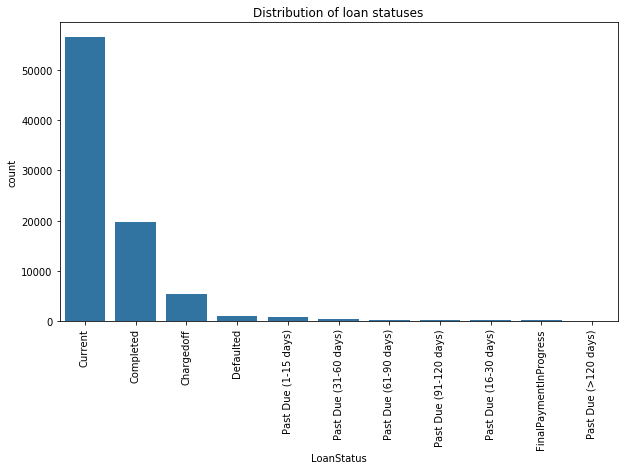

In [12]:
def loanStatus():
    color = sb.color_palette()[0]
    rcParams['figure.figsize'] = 10,5.5
    status_counts = loans['LoanStatus'].value_counts()
    status_sum = loans['LoanStatus'].value_counts().sum()
    plt.title('Distribution of loan statuses')
    freq = status_counts.index
    plt.xticks(rotation=90)
    sb.countplot(data=loans, x='LoanStatus', color=color,order=freq);
loanStatus()

## The distibution of defaulted and completed against Emplyement status
The goal was to get statistics with respect to status of emplyment around dafalted and completed loans.

There are 19664 completed loans while those defalted is 6341

it was considental that most who defalted and completed their loans were the employed

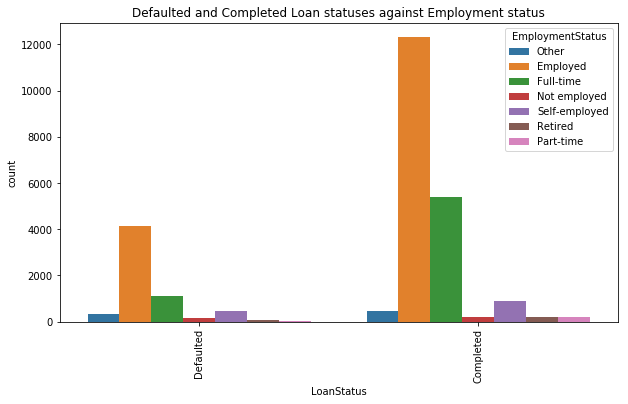

In [13]:
#fucntion to calculate the number of completed and defalated borrowers
completed_defalted = (loans['LoanStatus'] == 'Completed') | (loans['LoanStatus'] == 'Defaulted') | (loans['LoanStatus'] == 'Chargedoff')
loans = loans[completed_defalted]

def confirm_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
loans['LoanStatus'] = loans.apply(confirm_defaulted, axis=1)
loans['LoanStatus'].value_counts()

def loan_status_on_employ():
    sb.countplot(data = loans, x = 'LoanStatus', hue = 'EmploymentStatus',orient='v');
    plt.title('Defaulted and Completed Loan statuses against Employment status')
    plt.xticks(rotation=90)
loan_status_on_employ()

## The distribution of completed and defaulted loans agaiinst prosperity rating Alpha

As it can be seen that its clear that the most rating of the dfaulted loans is D while the mosting ratingamong the Completed loasn is D as well


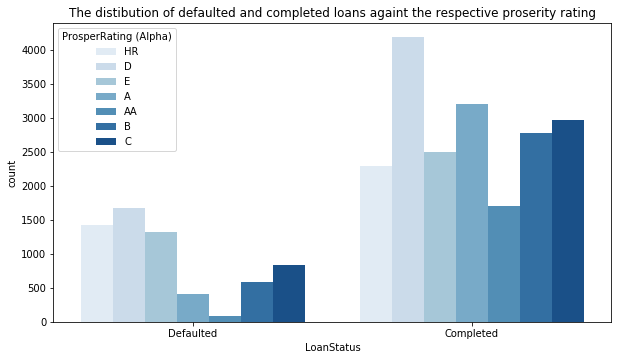

In [14]:
sb.countplot(data = loans, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues');
plt.title('The distibution of defaulted and completed loans againt the respective proserity rating');

## The distribution of interest rates for defaulted and completed loans

It is also clear that those who defaulted on their loans had high intreret rates on their loans while those who complated has low rates on their loans


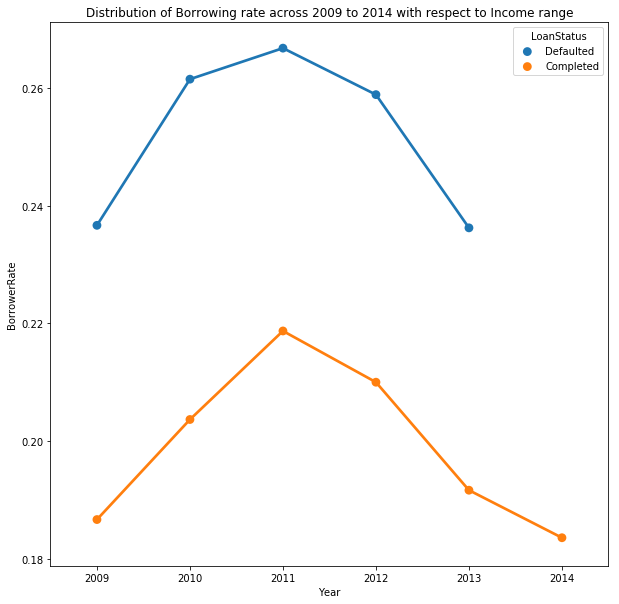

In [15]:
# plots the lineplot to analyze defaulted and completed loan status  rate over years
loans['Year'] = loans['LoanOriginationDate'].dt.year
loans['Month'] = loans['LoanOriginationDate'].dt.month
loans.head(2)
plt.figure(figsize=(10,10))
plt.title('Distribution of Borrowing rate across 2009 to 2014 with respect to Income range')
g=sb.pointplot(data=loans, x='Year', y='BorrowerRate', hue='LoanStatus',ci=None);

### Generate Slideshow
 

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_Prosper_Loan_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Prosper_Loan_slide_deck.ipynb to slides
[NbConvertApp] Writing 397385 bytes to Part_II_Prosper_Loan_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_Prosper_Loan_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 77